In [1]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from os import path

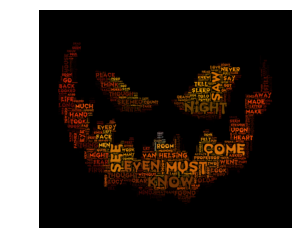

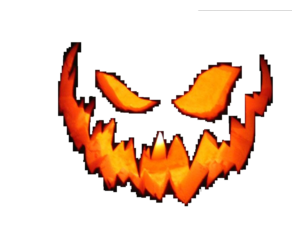

In [3]:
dir_text = 'text/'
dir_font = 'font/'

# sp00ky texts
texts = ['dracula.txt',
         'frankenstein.txt',
         'sleep_hollow.txt',
         'cthulhu.txt',
         'from_beyond.txt']

# text subset for test
# texts = ['dracula.txt',
#          'frankenstein.txt']

fulltext = ''

# Read the whole text.
for text in texts:
    fulltext += open(path.join(dir_text, text)).read()
    
# read the mask image
mask = np.array(Image.open("jacko_masked.bmp"))

# generate color func
colormap = np.array(Image.open("jacko_colormap.bmp"))
image_color = ImageColorGenerator(colormap)

stopwords = set(STOPWORDS)
more_stop_words = ['said', 'one', 'now', 'will',
                   'yet', 'time', 'may', 'us',
                   'day', 'came', 'well', 'good',
                   'way', 'happy', 'great', 'man',
                   'woman', 'friend']

for word in more_stop_words:
    stopwords.add(word)

wc = WordCloud(background_color="black", max_words=2000, mask=mask,
               stopwords=stopwords, color_func=image_color,
               font_path=(path.join(dir_font, 'Spooky Light.ttf')),
               max_font_size=125,
               width=2000, height=2000, scale=1)

# generate word cloud
wc.generate(fulltext)

# store to file
wc.to_file("halloween.png")

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.figure()
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()